In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_nc(d):
    return (d/2) * np.log(0.5) - d/4

In [3]:
pk = np.load("Data/NC/BenchN/pk.npy")
ka = np.load("Data/NC/BenchN/ka.npy")
wk = np.load("Data/NC/BenchN/wk.npy")
wka = np.load("Data/NC/BenchN/wka.npy")
sir = np.load("Data/NC/BenchN/sir.npz")

In [4]:
N = np.arange(2,501,2)

In [5]:
s_true = true_nc(3) * np.ones(N.shape[0])

In [6]:
def benchn_plot(N, pk, ka, wk, wka, s_true, sir, save_path):

    fig, ax = plt.subplots(figsize=(8., 6.0))

    ax.set_ylim(-2.8, -1.2)

    colors = {
        "KMED":    "#0072B2",   # blue
        "KAKMED":  "#E69F00",   # orange
        "WKMED":   "#006400",   # deep forest green
        "WKAKMED": "#CC00CC",   # magenta (highly distinct)
        "SIR":     "#CC79A7",   # light purple
    }

    # --- Curves ---
    ax.plot(N, pk,  label="KMED",
            linestyle="--", linewidth=2.4, color=colors["KMED"])

    ax.plot(N, ka,  label="KAKMED",
            linestyle="-.", linewidth=2.4, color=colors["KAKMED"])

    # --- WKMED ---
    ax.plot(N, wk, label="WKMED",
            linestyle="-", linewidth=2.8, color=colors["WKMED"])
    ax.scatter(N, wk, color=colors["WKMED"], s=18, marker="o", edgecolor="black", linewidth=0.4)

    # --- WKAKMED ---
    ax.plot(N, wka, label="WKAKMED",
            linestyle=(0, (5, 2)),  # long-dash
            linewidth=2.8,
            color=colors["WKAKMED"])

    # True curve
    ax.plot(N, s_true, label="True",
            linestyle="-", linewidth=2.6, color="black")

    # SIR
    ax.plot(N, sir["mu"], label="SIR",
            linestyle="--", linewidth=2.2, color=colors["SIR"])
    ax.fill_between(N,
                    sir["mu"] - sir["error"],
                    sir["mu"] + sir["error"],
                    color=colors["SIR"], alpha=0.15)

    # --- Axes labels ---
    ax.set_xlabel("N", fontsize=12)
    ax.set_ylabel(r"$\log Z_{1}$", fontsize=12)

    # --- Grid & ticks ---
    ax.grid(True, linestyle="--", alpha=0.35)
    ax.tick_params(labelsize=10)

    # --- Legend (consistent with earlier style) ---
    ax.legend(
        frameon=False,
        fontsize=9,
        ncol=2,
        handlelength=2
    )

    fig.tight_layout()
    fig.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

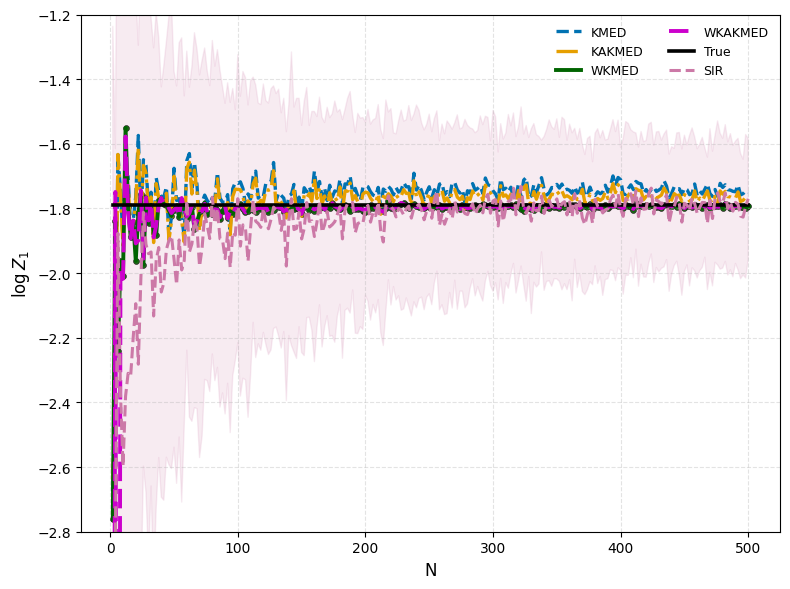

In [7]:
save_path = "Plots/NC/benchN.png"
benchn_plot(N, pk, ka, wk, wka, s_true, sir, save_path)